In [1]:
' This is where I load all of the data as dataframes into a list dataframes ' 

import pandas as pd

# Base name and file extension
base_name = "data_"
file_extension = ".xlsx"

# List to store dataframes
dataframes = []

# Use dtype=object to ensure all data is read as raw data without conversion
custom_na_values = ["N/A", "n/a", "-"] 

# Read and store each dataframe
for i in range(9, 20):  # from data_9 to data_19
    file_name = f"{base_name}{i}{file_extension}"
    df = pd.read_excel(file_name, dtype=object, na_values=custom_na_values)
    
    # Add the dataframe to the list
    dataframes.append(df)

# Get the column names from the first dataframe
standard_columns = dataframes[0].columns

# Rename columns in all dataframes to match the first dataframe's columns
for df in dataframes:
    df.columns = standard_columns
    
from IPython.display import display, Markdown

# Assuming 'dataframes' is your list of dataframes
# for i, df in enumerate(dataframes):
# display(Markdown(f"### DataFrame {i+9}"))  # +9 because your files start from data_9
#    display(df)

In [2]:
'The NAN entries are now converted into the average cahnge of a column across all pdfs or the average value of that column'
import pandas as pd
import numpy as np

def calculate_average_changes(dataframes):
    num_years = len(dataframes)
    # Exclude 'Country' and ensure other columns are treated as numeric
    average_changes = {col: [] for col in dataframes[0].columns if col != 'Country'}

    for col in list(average_changes.keys()):
        for i in range(1, num_years):
            # Convert to numeric, ignoring errors; this will turn non-convertible values to NaN
            current = pd.to_numeric(dataframes[i][col], errors='coerce')
            previous = pd.to_numeric(dataframes[i-1][col], errors='coerce')

            year_to_year_change = current - previous
            valid_changes = year_to_year_change.dropna()  # Use only valid numeric differences

            if not valid_changes.empty:
                average_changes[col].append(valid_changes.mean())
    
    # Calculate the mean of changes for each column
    for col in average_changes:
        if average_changes[col]:
            average_changes[col] = np.mean(average_changes[col])
        else:
            average_changes[col] = 0  # Assume no change if no valid data was available

    return average_changes

def fill_nans(dataframes, average_changes):
    num_years = len(dataframes)
    for i, df in enumerate(dataframes):
        # Work only with numeric columns, excluding 'Country'
        numeric_cols = [col for col in df.columns if col != 'Country']
        
        for col in numeric_cols:
            # Convert to numeric, ignoring errors
            df[col] = pd.to_numeric(df[col], errors='coerce')
            for idx in df.index:
                if pd.isna(df.at[idx, col]):
                    # Find a reference value from other years
                    ref_values = [pd.to_numeric(dataframes[j].at[idx, col], errors='coerce') for j in range(num_years)]
                    non_nan_values = [x for x in ref_values if not pd.isna(x)]
                    
                    if non_nan_values:
                        # Calculate adjustments based on the average change and the year difference
                        years_diff = [j - i for j in range(num_years) if not pd.isna(dataframes[j].at[idx, col])]
                        adjustments = [average_changes[col] * diff for diff in years_diff]
                        adjusted_values = [val + adj for val, adj in zip(non_nan_values, adjustments)]
                        df.at[idx, col] = abs(np.mean(adjusted_values))
                    else:
                        # Fallback: Use the column average of the current year
                        column_mean = df[col].mean(skipna=True)
                        df.at[idx, col] = column_mean

# Apply the functions
average_changes = calculate_average_changes(dataframes)
fill_nans(dataframes, average_changes)

# Optionally display results for verification
for i, df in enumerate(dataframes):
    display(Markdown(f"### DataFrame {i+9}"))  # +9 because your files start from data_9
    display(df)

### DataFrame 9

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   21.5             924    5.064000e+06   
1          Brazil                  193.2            1667    4.802000e+06   
2           China                 1338.0            5090    5.087500e+07   
3           Japan                  127.3            5201    2.429143e+07   
4          Russia                  141.9            1226    1.994000e+07   
5          Sweden                    9.3             438    4.899000e+06   
6  United Kingdom                   62.0            2419    2.935700e+07   
7   United States                  306.8           14419    5.510300e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                50.02                          61.08   
1                                67.94                          17.07   
2                               229.06                           7.36   
3                                86.89                          51.81   
4                                34.40                          21.35   
5                                11.62                          48.31   
6                               102.46                          53.46   
7                               679.42                          70.32   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.3        35.9          1.8   
1                                         3.7        27.7          0.9   
2                                         2.1        33.7          0.7   
3                                         7.3        43.9          0.0   
4                                         3.5        36.8          0.1   
5                                         7.2        39.7          0.8   
6                                         8.2        38.3          0.8   
7                                         7.9        35.9          0.9   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                               1494       5016   
1            5.8                               6663       1866   
2           19.8                               6338      25795   
3            2.7                                418      18637   
4            6.0                                220       4356   
5            1.6                                 17       3480   
6            3.5                                 66       1730   
7            3.0                                438     113120   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                2.270000               38.580000  
1                2.660000               50.830000  
2                7.940000               52.690000  
3               23.024241               84.845098  
4                3.820000               38.460000  
5                5.750000               80.750000  
6                8.780000               68.800000  
7                5.660000               37.720000

### DataFrame 10

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   22.3            1144    3.993640e+06   
1          Brazil                  195.9            2208    5.161000e+06   
2           China                 1341.0            5930    5.566400e+07   
3           Japan                  128.1            5700    2.322107e+07   
4          Russia                  142.9            1525    1.886964e+07   
5          Sweden                    9.4             488    5.183000e+06   
6  United Kingdom                   62.8            2481    2.891100e+07   
7   United States                  309.3           14964    6.001000e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                            60.640000                          61.08   
1                            74.620000                          18.37   
2                           266.290000                           7.36   
3                           109.610000                          51.81   
4                            43.850000                          22.96   
5                           109.915643                          49.06   
6                           101.510000                          52.07   
7                           720.490000                          68.58   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.1        35.9          1.8   
1                                         3.6        27.7          0.9   
2                                         2.2        33.7          0.7   
3                                         7.4        43.9          0.0   
4                                         3.1        36.8          0.0   
5                                         6.9        39.7          0.9   
6                                         8.1        38.3          0.8   
7                                         7.9        35.9          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                                 33       1032   
1            5.6                               6140       1030   
2           19.5                             239022      28942   
3            2.7                                442       3944   
4            6.0                                209       3017   
5            1.6                                 19        156   
6            3.4                                 59        132   
7            2.9                                410       5843   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                 1.60000               22.760000  
1                 2.02000               21.230000  
2                 3.97000               29.470000  
3                22.95433               85.948616  
4                 0.30000               10.560000  
5                 0.44000              100.000000  
6                 1.98000               33.150000  
7                 0.46000               20.850000

### DataFrame 11

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   22.6            1394    2.923280e+06   
1          Brazil                  195.9            2616    5.161000e+06   
2           China                 1341.0            7551    5.758000e+03   
3           Japan                  127.8            6157    2.215071e+07   
4          Russia                  143.2            2051    1.779928e+07   
5          Sweden                    9.5             538    1.156700e+07   
6  United Kingdom                   63.3            2659    3.038400e+07   
7   United States                  311.6           15518    6.347742e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                            60.640000                          61.08   
1                            74.620000                          18.37   
2                           266.290000                           7.36   
3                           109.670000                          51.81   
4                            43.850000                          22.96   
5                            98.020393                          49.06   
6                           101.510000                          52.07   
7                           720.490000                          68.58   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.1        36.2          1.6   
1                                         3.6        28.6          0.9   
2                                         2.2        34.5          0.7   
3                                         7.4        44.5         -0.1   
4                                         3.1        37.1          0.1   
5                                         6.9        39.7          0.9   
6                                         8.1        38.6          0.8   
7                                         7.9        36.2          0.9   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                                 37       1946   
1            5.5                               5749        737   
2           19.3                               4931      13188   
3            2.7                                474       9482   
4            5.9                                208      28950   
5            1.5                                 20       3460   
6            3.2                                 53       5452   
7            2.8                                414      46506   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                 1.66000               14.150000  
1                 7.41000               36.540000  
2                 2.02000               30.550000  
3                22.88442               87.052134  
4                 0.28000               44.730000  
5                 0.60000               50.000000  
6                 0.36000               69.530000  
7                 0.29000               32.260000

### DataFrame 12

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   22.9            1543    1.852920e+06   
1          Brazil                  199.7            2465    5.677000e+06   
2           China                 1347.0            8532    5.772500e+07   
3           Japan                  127.5            6203    2.108035e+07   
4          Russia                  143.7            2210    1.672892e+07   
5          Sweden                    9.6             525    1.237200e+07   
6  United Kingdom                   63.7            2704    3.041100e+07   
7   United States                  313.9           16155    6.696690e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                            66.350000                          65.29   
1                            94.750000                          19.71   
2                           318.470000                           8.63   
3                            98.900000                          49.76   
4                            58.720000                          25.11   
5                            86.125143                          50.73   
6                           115.410000                          50.74   
7                           736.690000                          69.66   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         7.4        36.2          1.7   
1                                         3.4        29.0          0.9   
2                                         2.5        34.8          0.7   
3                                         9.0        44.8         -0.1   
4                                         3.1        37.2          0.2   
5                                         9.0        39.8          0.9   
6                                         8.1        38.7          0.8   
7                                         7.9        36.3          0.9   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                                 39       4583   
1            5.2                               5439       1650   
2           19.0                               4577      35724   
3            2.8                                498       6479   
4            5.6                                217       8671   
5            1.4                                 20       4952   
6            3.0                                 49       2381   
7            2.7                                410      21699   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                1.990000               33.060000  
1                6.790000               25.930000  
2                2.060000               37.330000  
3               22.814509               88.155652  
4                0.300000               19.150000  
5                1.170000               37.780000  
6                1.810000               39.680000  
7                3.170000               34.900000

### DataFrame 13

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   23.1            1573    7.825600e+05   
1          Brazil                  201.4            2472    5.813000e+06   
2           China                 1350.0            9570    5.568600e+07   
3           Japan                  127.3            5155    2.000999e+07   
4          Russia                  143.7            2297    1.565856e+07   
5          Sweden                    9.6             579    1.098000e+07   
6  United Kingdom                   64.1            2786    3.194600e+07   
7   United States                  316.1           16692    7.164290e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                            68.190000                          65.29   
1                            95.590000                          20.54   
2                           352.790000                           9.70   
3                           107.570000                          49.76   
4                            64.070000                          25.65   
5                            74.229893                          52.06   
6                           118.600000                          51.04   
7                           743.170000                          69.23   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         5.9        41.8          1.6   
1                                         3.6        29.5          0.9   
2                                         2.7        35.1          0.7   
3                                         9.0        45.1         -0.1   
4                                         3.2        37.4          0.2   
5                                         9.2        39.8          1.0   
6                                         8.0        38.8          0.7   
7                                         7.9        36.4          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                                 38       1761   
1            4.9                               5194       3953   
2           18.8                               4305      15130   
3            2.9                                511       5070   
4            5.3                                209      28108   
5            1.2                                 21       8118   
6            2.8                                 46       4020   
7            2.5                                405      45874   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                1.520000                32.67000  
1                8.450000                29.98000  
2                2.720000                24.85000  
3               22.744598                89.25917  
4                0.210000                28.43000  
5                0.960000                30.65000  
6                0.770000                51.96000  
7                3.240000                30.64000

### DataFrame 14

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   23.4            1454    2.878000e+05   
1          Brazil                  203.2            2455    6.430000e+06   
2           China                 1354.0           10481    5.562200e+07   
3           Japan                  127.1            4850    1.893963e+07   
4          Russia                  143.9            2056    1.458820e+07   
5          Sweden                    9.7             570    1.052200e+07   
6  United Kingdom                   64.6            3065    3.360400e+07   
7   United States                  318.4           17428    7.537935e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                68.12                          62.48   
1                               100.40                          20.97   
2                               390.87                          10.45   
3                               110.54                          49.76   
4                                72.19                          25.18   
5                                50.96                          53.29   
6                               124.90                          52.56   
7                               762.71                          69.66   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.1        36.3          1.5   
1                                         3.7        29.9          0.9   
2                                         2.8        35.3          0.7   
3                                         9.0        45.5         -0.2   
4                                         3.2        37.5          0.2   
5                                         9.2        39.8          1.0   
6                                         8.0        38.9          0.7   
7                                         8.2        36.5          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.2                                 39       3311   
1            4.6                               4869       1701   
2           18.5                               4027      52669   
3            3.0                                517       7235   
4            5.0                                206      10788   
5            1.0                                 20       2653   
6            2.7                                 42       2264   
7            2.4                                399      28934   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                5.370000               32.670000  
1                4.920000               22.590000  
2                3.120000               35.970000  
3               22.674687               90.362687  
4                0.350000               50.280000  
5                0.700000               20.670000  
6                0.600000               30.560000  
7                2.970000               28.250000

### DataFrame 15

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   23.8            1349    1.262227e+06   
1          Brazil                  204.5            1803    6.306000e+06   
2           China                 1357.0           11191    5.688600e+07   
3           Japan                  126.9            4389    1.786927e+07   
4          Russia                  144.1            1363    1.351784e+07   
5          Sweden                    9.8             495    6.482000e+06   
6  United Kingdom                   65.1            2888    3.514900e+07   
7   United States                  320.7           18121    7.777352e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                69.78                          63.78   
1                               102.03                          20.35   
2                               436.18                          11.19   
3                               114.13                          49.76   
4                                76.84                          23.06   
5                                50.97                          55.14   
6                               131.51                          53.35   
7                               798.22                          72.29   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.4        36.3          1.5   
1                                         3.9        30.3          0.9   
2                                         3.0        35.6          0.7   
3                                         9.0        45.9         -0.2   
4                                         3.1        37.6          0.2   
5                                         9.1        39.8          1.0   
6                                         7.9        39.0          0.7   
7                                         8.5        36.6          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.1                                 40       3254   
1            4.5                               4693        865   
2           18.3                               3963      41237   
3            3.1                                524       4447   
4            4.8                                192       9422   
5            0.9                                 21      10549   
6            2.6                                 41        130   
7            2.3                                393      75089   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                7.070000               24.770000  
1                7.630000               23.250000  
2                2.150000               20.510000  
3               22.604777               91.466205  
4                0.140000               33.250000  
5                1.080000               31.640000  
6                0.620000               25.220000  
7                1.720000               23.280000

### DataFrame 16

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   24.1            1208    1.971950e+06   
1          Brazil                  206.2            1796    6.547000e+06   
2           China                 1359.0           11680    5.927000e+07   
3           Japan                  126.7            4919    1.679891e+07   
4          Russia                  144.3            1284    1.244748e+07   
5          Sweden                    9.9            1578    6.782000e+06   
6  United Kingdom                   65.6            1657    3.735800e+07   
7   United States                  323.1            1699    7.640749e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                72.46                          63.78   
1                                94.14                          20.35   
2                               487.96                          11.93   
3                               117.71                          49.76   
4                                77.46                          22.52   
5                                50.96                          56.00   
6                               143.78                          53.65   
7                               824.03                          75.63   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.3        36.2          1.6   
1                                         3.9        30.7          0.8   
2                                         2.9        35.9          0.6   
3                                         9.0        46.3         -0.2   
4                                         3.0        37.7          0.3   
5                                         9.1        39.8          1.1   
6                                         7.9        39.0          0.7   
7                                         8.6        36.7          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.1                                 40       5005   
1            4.4                               4605       4218   
2           17.9                               4055      48530   
3            3.1                                534       6987   
4            4.4                                181      21202   
5            0.9                                 21       8338   
6            2.5                                 39       7205   
7            2.1                                384      94010   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                    3.79                   26.54  
1                   48.46                   97.13  
2                    1.86                   34.49  
3                   12.54                   99.04  
4                    0.19                   48.72  
5                    1.25                   26.48  
6                    0.66                   62.88  
7                    1.48                   23.56

### DataFrame 17

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   24.6            1323    2.549323e+06   
1          Brazil                  207.7            2056    6.589000e+06   
2           China                 1362.0           12237    6.074000e+07   
3           Japan                  126.5            4872    1.572855e+07   
4          Russia                  144.5            1578    1.137712e+07   
5          Sweden                   10.0             538    7.054000e+06   
6  United Kingdom                   66.0            2624    3.954300e+07   
7   United States                  325.1           19485    7.718674e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                74.26                          66.41   
1                                96.40                          20.33   
2                               551.23                          12.60   
3                               123.90                          49.76   
4                                89.37                          22.57   
5                                50.96                          55.96   
6                               151.16                          53.33   
7                               849.40                          76.58   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.4        36.3          1.6   
1                                         4.0        31.2          0.8   
2                                         2.9        36.2          0.6   
3                                         9.0        46.7         -0.3   
4                                         3.1        39.9          0.2   
5                                         9.1        39.7          1.0   
6                                         7.8        39.1          0.6   
7                                         8.5        36.9          0.8   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.1                                 39      10078   
1            4.3                               4465       2275   
2           17.5                               3830      43462   
3            3.1                                533       7597   
4            4.1                                168      12010   
5            0.8                               1211       9593   
6            2.4                                 38       6884   
7            2.0                                374     151766   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                    2.46                   35.57  
1                   12.81                   34.06  
2                    5.66                   35.68  
3                   35.19                   91.40  
4                    5.74                   88.08  
5                    1.16                   24.51  
6                    0.92                   55.00  
7                    2.46                   26.83

### DataFrame 18

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   24.9            1432    3.053167e+06   
1          Brazil                  208.5            1868    6.621000e+06   
2           China                 1364.0           13608    6.290000e+08   
3           Japan                  126.4            4971    1.465819e+07   
4          Russia                  144.7            1657    1.030676e+07   
5          Sweden                   10.2             554    7.440000e+06   
6  United Kingdom                   66.4            2860    3.866400e+07   
7   United States                  327.2           20580    7.974592e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                75.67                          64.61   
1                               102.10                          21.02   
2                               611.43                          13.40   
3                               126.38                          49.76   
4                                99.32                          22.87   
5                                50.96                          56.59   
6                               165.38                          54.41   
7                               889.02                          80.59   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         6.3        36.3          1.5   
1                                         3.9        31.6          0.8   
2                                         2.9        36.6          0.4   
3                                         9.0        47.1         -0.3   
4                                         3.2        38.1          0.1   
5                                         9.3        39.6          1.0   
6                                         7.9        39.1          0.5   
7                                         8.5        37.0          0.7   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.1                                 39       3493   
1            4.3                               4375       6485   
2           17.0                               3454      45798   
3            3.1                                537       7526   
4            4.1                                164      14810   
5            0.8                                 20      19682   
6            2.5                                 40      27526   
7            2.0                                378     197252   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                    3.01                   19.67  
1                   12.29                   40.42  
2                    0.81                   44.06  
3                   13.04                   93.32  
4                    0.11                   42.19  
5                    0.86                   35.86  
6                    0.48                   90.10  
7                    1.28                   29.95

### DataFrame 19

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0       Australia                   25.4            1392    3.512893e+06   
1          Brazil                  209.3            1839    6.353000e+06   
2           China                 1366.0           14342    6.572500e+07   
3           Japan                  126.2            5081    1.358783e+07   
4          Russia                  144.9            1699    9.236400e+06   
5          Sweden                   10.3             530    7.616000e+06   
6  United Kingdom                   66.8            2827    3.941800e+07   
7   United States                  328.2           21427    7.944200e+07   

   International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                76.85                       64.61000   
1                               102.91                       21.12000   
2                               659.62                       14.17000   
3                               130.23                       47.44517   
4                               108.86                       23.72000   
5                                50.96                       57.70000   
6                               142.39                       55.16000   
7                               926.73                       85.87000   

   Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                         7.1        36.4          1.5   
1                                         3.9        32.0          0.7   
2                                         3.0        37.0          0.3   
3                                         9.0        47.6         -0.4   
4                                         3.5        38.3          0.0   
5                                         9.2        39.6          1.0   
6                                         8.1        39.3          0.5   
7                                         8.5        37.3          0.6   

   Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0            1.1                                 40      13405   
1            4.3                               4309       2936   
2           16.7                               3270      78770   
3            3.1                                542       6908   
4            4.1                                161      18471   
5            0.8                                 19      12570   
6            2.4                                 40      20341   
7            2.0                                382     175826   

   Positive Flu Tests Min  Positive Flu Tests Max  
0                    2.34                   27.34  
1                   12.10                   18.69  
2                    3.59                   41.29  
3                   28.95                   93.14  
4                    0.13                   62.22  
5                    0.30                   22.56  
6                    1.61                   93.75  
7                    3.02                   26.46

In [3]:
'Concatenation Use Case: If youre interested in time-series analysis or if the temporal sequence of data points is important'

'Method: Vertically Concatenate: Stack the dataframes one on top of the other, preserving the order of years. This approach treats each year as a separate observation for each country.'

import pandas as pd

# Assuming 'dataframes' is a list of your dataframes
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

Country  Population (millions)  GDP (Billions)  Tourist Trips   \
0        Australia                   21.5             924    5.064000e+06   
1           Brazil                  193.2            1667    4.802000e+06   
2            China                 1338.0            5090    5.087500e+07   
3            Japan                  127.3            5201    2.429143e+07   
4           Russia                  141.9            1226    1.994000e+07   
..             ...                    ...             ...             ...   
83           Japan                  126.2            5081    1.358783e+07   
84          Russia                  144.9            1699    9.236400e+06   
85          Sweden                   10.3             530    7.616000e+06   
86  United Kingdom                   66.8            2827    3.941800e+07   
87   United States                  328.2           21427    7.944200e+07   

    International Passengers (Millions)  Mean Income Per Day (Dollars)  \
0                                 50.02                       61.08000   
1                                 67.94                       17.07000   
2                                229.06                        7.36000   
3                                 86.89                       51.81000   
4                                 34.40                       21.35000   
..                                  ...                            ...   
83                               130.23                       47.44517   
84                               108.86                       23.72000   
85                                50.96                       57.70000   
86                               142.39                       55.16000   
87                               926.73                       85.87000   

    Public Healthcare Expenditure (Percentage)  Median Age  Growth Rate  \
0                                          6.3        35.9          1.8   
1                                          3.7        27.7          0.9   
2                                          2.1        33.7          0.7   
3                                          7.3        43.9          0.0   
4                                          3.5        36.8          0.1   
..                                         ...         ...          ...   
83                                         9.0        47.6         -0.4   
84                                         3.5        38.3          0.0   
85                                         9.2        39.6          1.0   
86                                         8.1        39.3          0.5   
87                                         8.5        37.3          0.6   

    Air Pollution  Water Quality Deaths (Percentage)  Flu Cases  \
0             1.2                               1494       5016   
1             5.8                               6663       1866   
2            19.8                               6338      25795   
3             2.7                                418      18637   
4             6.0                                220       4356   
..            ...                                ...        ...   
83            3.1                                542       6908   
84            4.1                                161      18471   
85            0.8                                 19      12570   
86            2.4                                 40      20341   
87            2.0                                382     175826   

    Positive Flu Tests Min  Positive Flu Tests Max  
0                 2.270000               38.580000  
1                 2.660000               50.830000  
2                 7.940000               52.690000  
3                23.024241               84.845098  
4                 3.820000               38.460000  
..                     ...                     ...  
83               28.950000               93.140000  
84                0.130000               62.220000  
85            

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X =  combined_df.drop(['Flu Cases', 'Country'], axis=1) 
y =  combined_df['Flu Cases']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape y_train and y_test to be one-dimensional
y_train = y_train.ravel()
y_test = y_test.ravel()

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.08940210702247163


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = gbm_model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08940210702247163
R-squared: 0.9389421420695797


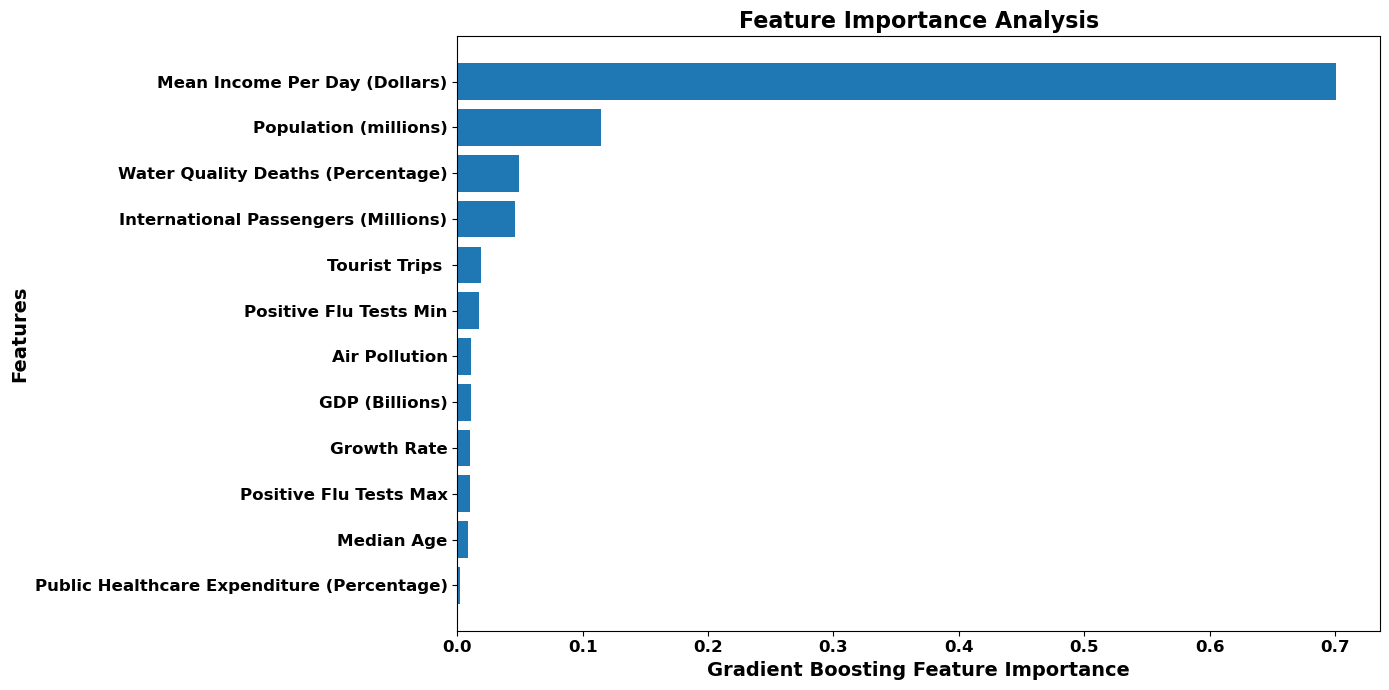

In [6]:
# Feature importance
feature_importance = gbm_model.feature_importances_
features = X.columns
sorted_idx = feature_importance.argsort()

# Visualize feature importance
plt.figure(figsize=(14, 7))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=14, fontweight='bold')
plt.title("Feature Importance Analysis", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('gradient_boosting_feature_importance.png', bbox_inches='tight', pad_inches=0.1)
plt.show()



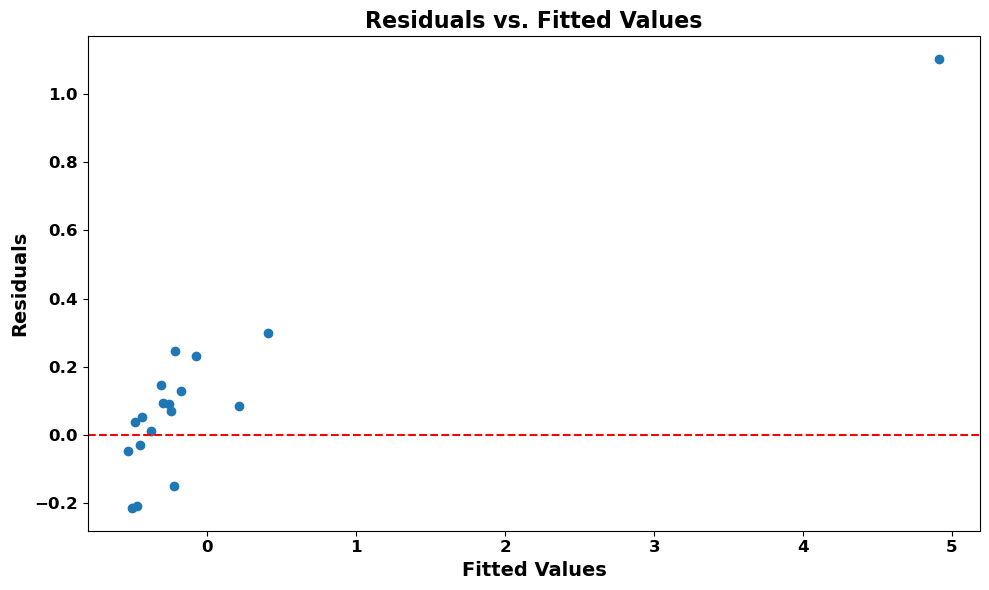

In [7]:
# Residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Fitted Values', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.title('Residuals vs. Fitted Values', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('residuals_vs_fitted_values.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


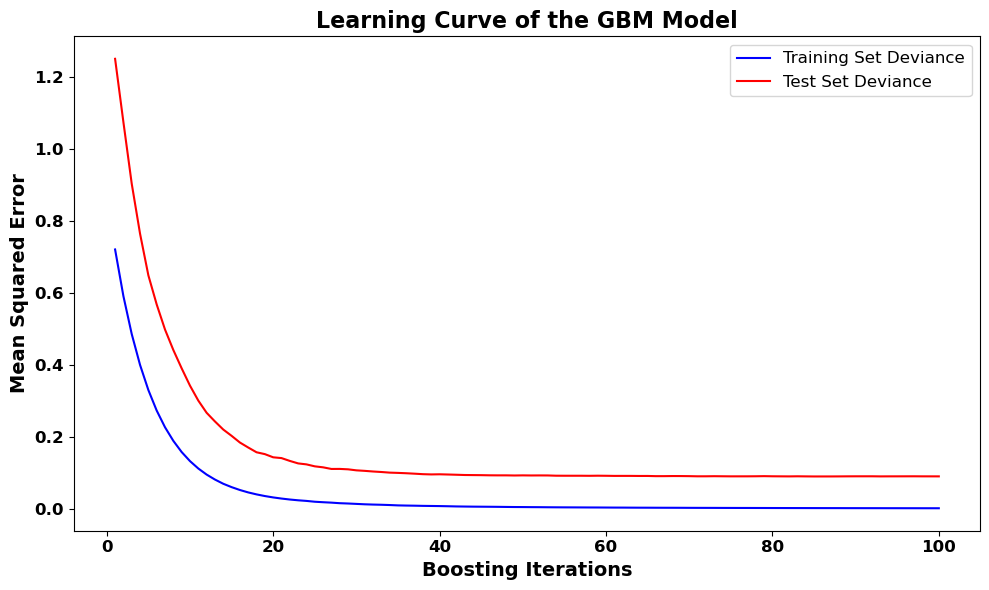

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Number of boosting iterations (estimators)
n_estimators = gbm_model.n_estimators

# Initialize an array to store test scores
test_score = np.zeros((n_estimators,), dtype=np.float64)

# Calculate the test score at each boosting iteration using staged_predict
for i, y_pred in enumerate(gbm_model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_estimators) + 1, gbm_model.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
plt.xlabel('Boosting Iterations', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize=14, fontweight='bold')
plt.title('Learning Curve of the GBM Model', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('learning_curve_gbm_model.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

